###### PeerloansKart is an NBFC (Non-banking Financial Company) that facilitates peer-to-peer loans.
It connects people who need money (borrowers) with people who have money (investors). As an investor, you would
want to invest in people who showed a profile of having a high probability of paying you back.
You “as an ML expert” create a model that will help predict whether a borrower will pay the loans or not

###### Objective: Increase profits up to 20% as NPA will be reduced due to loans disbursal for only creditworthy borrowers


In [1]:
# importing Lobraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_borowwer_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [5]:
loans.shape

(9578, 14)

In [6]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
# renaming the column names. capitalizing 1st letter

In [8]:
cols= list(loans.columns)

In [9]:
for i in cols:
    i.capitalize()

In [10]:
feat_cols = []
for i in cols:
    feat_cols.append(i.capitalize().replace(".","_"))
print(feat_cols)

['Credit_policy', 'Purpose', 'Int_rate', 'Installment', 'Log_annual_inc', 'Dti', 'Fico', 'Days_with_cr_line', 'Revol_bal', 'Revol_util', 'Inq_last_6mths', 'Delinq_2yrs', 'Pub_rec', 'Not_fully_paid']


In [11]:
# assigning modified column names to dataframe
loans.columns = feat_cols

In [12]:
loans.head()

,Credit_policy,Purpose,Int_rate,Installment,Log_annual_inc,Dti,Fico,Days_with_cr_line,Revol_bal,Revol_util,Inq_last_6mths,Delinq_2yrs,Pub_rec,Not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [13]:
loans.Purpose.value_counts()

Purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

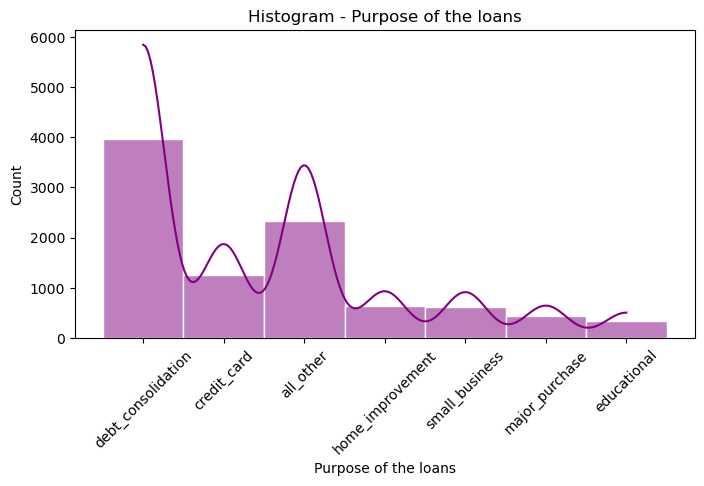

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(loans, x = 'Purpose',kde = True, color='purple',element='bars', edgecolor = 'white')
plt.xticks(rotation = 45)
plt.title("Histogram - Purpose of the loans")
plt.xlabel("Purpose of the loans")
plt.show()

In [15]:
loans.isnull().sum()

Credit_policy        0
Purpose              0
Int_rate             0
Installment          0
Log_annual_inc       0
Dti                  0
Fico                 0
Days_with_cr_line    0
Revol_bal            0
Revol_util           0
Inq_last_6mths       0
Delinq_2yrs          0
Pub_rec              0
Not_fully_paid       0
dtype: int64

In [17]:
loans.describe()

,Credit_policy,Int_rate,Installment,Log_annual_inc,Dti,Fico,Days_with_cr_line,Revol_bal,Revol_util,Inq_last_6mths,Delinq_2yrs,Pub_rec,Not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


##### Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

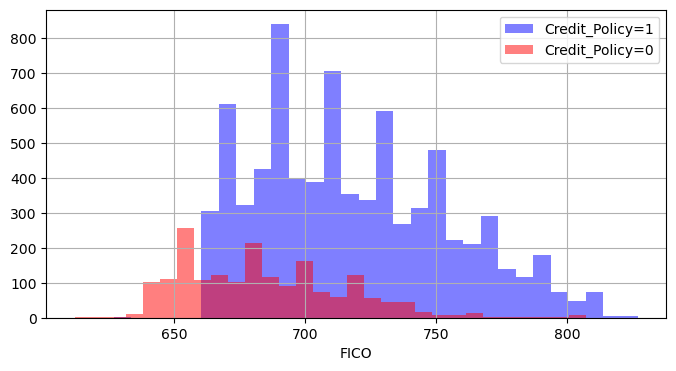

In [16]:
plt.figure(figsize=(8,4))
loans[loans['Credit_policy']==1]['Fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit_Policy=1')
loans[loans['Credit_policy']==0]['Fico'].hist(alpha=0.5,color='red',bins=30,label='Credit_Policy=0')
plt.legend()
plt.xlabel('FICO')

##### Create a similar figure; select the not.fully.paid column

In [18]:
loans.Not_fully_paid.unique()

array([0, 1], dtype=int64)

In [19]:
loans.Not_fully_paid.value_counts()

Not_fully_paid
0    8045
1    1533
Name: count, dtype: int64

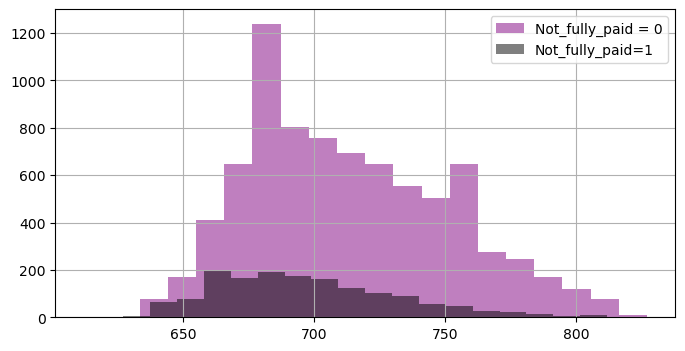

In [45]:
plt.figure(figsize = (8,4))
loans[loans['Not_fully_paid']==0]['Fico'].hist(bins = 20,color = 'purple', alpha = 0.5, label = 'Not_fully_paid = 0')
loans[loans['Not_fully_paid']==1]['Fico'].hist(alpha = 0.5, color='black', bins = 20, label = 'Not_fully_paid=1')
plt.legend()
plt.show()

##### Create a countplot using seaborn showing the counts of loans by purpose with the hue defined by not.fully.paid.

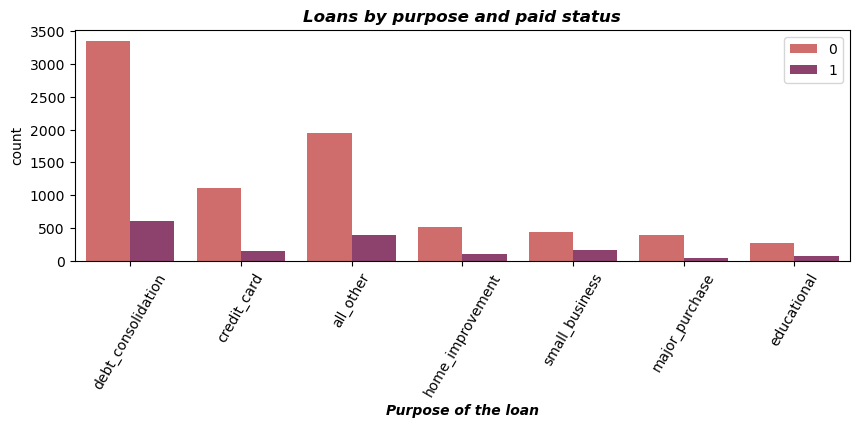

In [82]:
plt.figure(figsize=(10,3))
sns.countplot(loans,x = 'Purpose', hue='Not_fully_paid', palette='flare')
plt.title("Loans by purpose and paid status", fontweight = 'bold', fontstyle = 'italic')
plt.xlabel("Purpose of the loan", fontstyle = 'italic', fontweight = 'bold')
plt.legend()
plt.xticks(rotation = 60)
plt.show()

In [83]:
cat_features = ['Purpose']

In [89]:
df = pd.get_dummies(loans, columns= cat_features, drop_first=True, dtype='int')

In [90]:
df

,Credit_policy,Int_rate,Installment,Log_annual_inc,Dti,Fico,Days_with_cr_line,Revol_bal,Revol_util,Inq_last_6mths,Delinq_2yrs,Pub_rec,Not_fully_paid,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_major_purchase,Purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Credit_policy               9578 non-null   int64  
 1   Int_rate                    9578 non-null   float64
 2   Installment                 9578 non-null   float64
 3   Log_annual_inc              9578 non-null   float64
 4   Dti                         9578 non-null   float64
 5   Fico                        9578 non-null   int64  
 6   Days_with_cr_line           9578 non-null   float64
 7   Revol_bal                   9578 non-null   int64  
 8   Revol_util                  9578 non-null   float64
 9   Inq_last_6mths              9578 non-null   int64  
 10  Delinq_2yrs                 9578 non-null   int64  
 11  Pub_rec                     9578 non-null   int64  
 12  Not_fully_paid              9578 non-null   int64  
 13  Purpose_credit_card         9578 

In [92]:
target = df['Not_fully_paid']

In [93]:
df.drop(columns=['Not_fully_paid'], axis = 1, inplace=True)

In [96]:
X = df; y = target

In [98]:
X.shape, y.shape

((9578, 18), (9578,))

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=31)

In [101]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6704, 18)
(6704,)
(2874, 18)
(2874,)


In [102]:
dtclassifier = DecisionTreeClassifier()

In [103]:
dtclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [104]:
dt_pred = dtclassifier.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [107]:
accuracy_score(y_test, dt_pred)

0.7453027139874739

##### Hyperparameter Tuning

In [108]:
from sklearn.model_selection import GridSearchCV

In [111]:
dt_params = {"criterion":['gini','entropy'],
             'max_depth':[5,7,9,11,13],
             'min_samples_split':[2,5,8]
             }

In [112]:
dtgrid = GridSearchCV(dtclassifier, param_grid=param_grid, cv = 5, scoring='accuracy')

In [113]:
dtgrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11, 13],
                         'min_samples_split': [2, 5, 8]},
             scoring='accuracy')

In [114]:
dtgrid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 8}

###### Training with tuned params

In [115]:
dtunedclassifier = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_split=8)

In [116]:
dtunedclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=8)

In [125]:
dtuned_preds = dtunedclassifier.predict(X_test)

In [126]:
accuracy_score(y_test, dtuned_preds)

0.8347251217814892

In [120]:
# see above the accuracy has increased significantly once tuning is done

### Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rfclassifier = RandomForestClassifier()

In [124]:
rfclassifier.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
rf_pred = rfclassifier.predict(X_test)

In [128]:
accuracy_score(y_test, rf_pred)

0.8329853862212944

In [134]:
rf_params = {'n_estimators':[50,100,150,200,250,300],
         'criterion':['gini','entropy'],
         'max_depth':[2,5,8,11,14,20],
         'min_samples_split':[2,5,8,11,14]
         }

In [135]:
rfgrid = GridSearchCV(rfclassifier, param_grid=rf_params, cv = 3, scoring='accuracy')

In [136]:
rfgrid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 8, 11, 14, 20],
                         'min_samples_split': [2, 5, 8, 11, 14],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='accuracy')

In [137]:
rfgrid.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_split': 2,
 'n_estimators': 50}

In [141]:
rftunedclassifier = RandomForestClassifier(n_estimators =50 , criterion ='gini' , max_depth =11 , min_samples_split = 2)

In [142]:
rftunedclassifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=50)

In [143]:
rftuned_pred = rftunedclassifier.predict(X_test)

In [144]:
accuracy_score(y_test, rftuned_pred)

0.8340292275574113

In [146]:
print(classification_report(y_test, rftuned_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2402
           1       0.27      0.01      0.01       472

    accuracy                           0.83      2874
   macro avg       0.55      0.50      0.46      2874
weighted avg       0.74      0.83      0.76      2874



### deployment

In [147]:
import joblib
import pickle

In [150]:
with open('Loan_borrower_RF.pkl', 'wb') as model_file:
    joblib.dump(rftunedclassifier, model_file)

In [151]:
with open('Loan_borrower_RF.h5', 'wb') as model_file:
    pickle.dump(rftunedclassifier, model_file)

In [153]:
with open('Loan_borrower_RF.pkl', 'rb') as model_file:
    load_model = joblib.load(model_file)

In [154]:
with open('Loan_borrower_RF.h5', 'rb') as model_file:
    load_model = pickle.load(model_file)